In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_excel('/content/Modelo 1.xlsx')

In [ ]:
df

,Total_Prisões,Oficiais,Praça,Agentes,Comissários,Delegados,Escrivães,Viaturas
0,17,14,363,17,38,6,11,25
1,30,14,363,17,38,6,11,25
2,24,14,363,17,38,6,11,25
3,36,14,363,17,38,6,11,25
4,19,14,363,20,36,7,11,22
...,...,...,...,...,...,...,...,...
204,20,9,261,33,9,7,12,27
205,24,9,261,33,9,7,12,27
206,17,9,261,33,9,7,12,27
207,12,9,261,33,9,7,12,27


In [ ]:
# Separar as features (X) e o target (y)
X = df.drop('Total_Prisões', axis=1)  # Definindo Total de prisões como coluna alvo
y = df['Total_Prisões']

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
train_data, train_targets = X_train, y_train
test_data, test_targets = X_test, y_test

In [ ]:
# Normalizar os dados para facilitar o treinamento da rede
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data)
X_test_scaled = scaler.transform(test_data)

In [ ]:
# Visualizando um head dos dados
X_train_scaled[0]

array([-0.85897579, -0.80667632,  0.87131696, -0.90105358, -2.0123146 ,
       -0.27224887, -0.0886928 ])

In [ ]:
# Definindo a métrica RMSE personalizada
def rmse(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)  # Converte y_true para float32
    y_pred = tf.cast(y_pred, tf.float32)  # Converte y_pred para float32
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

In [ ]:
#  Construção do Modelo
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1:])))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=[rmse])
    return model

model = build_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,113 (164.50 KB)

 Trainable params: 42,113 (164.50 KB)

 Non-trainable params: 0 (0.00 B)

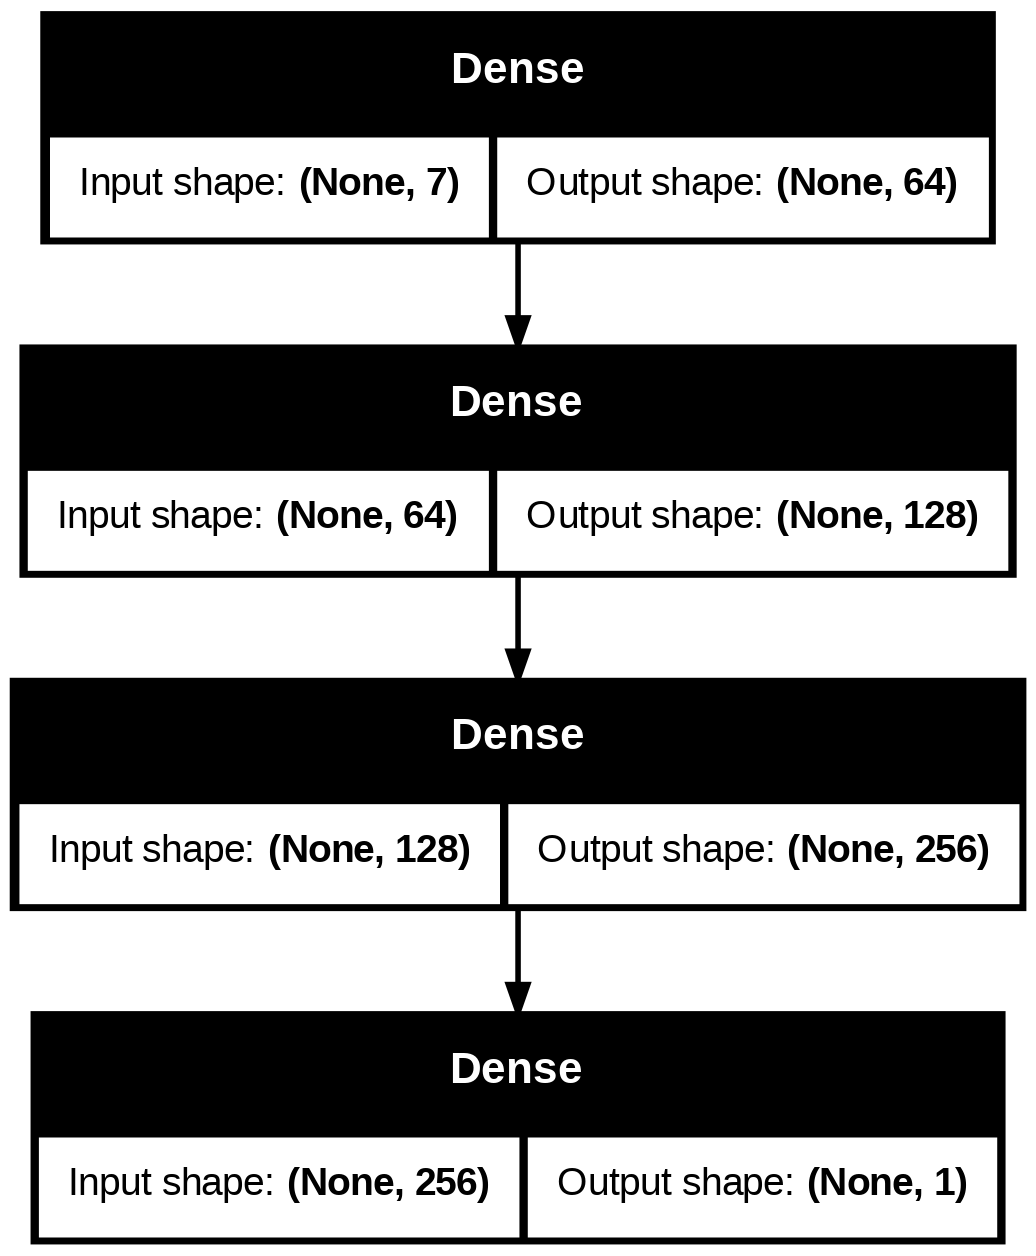

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
#Treinar o modelo
history = model.fit(train_data, train_targets, epochs=150, validation_split=0.2)

Epoch 1/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 537.4771 - rmse: 21.0674 - val_loss: 236.4066 - val_rmse: 13.4523
Epoch 2/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 183.5278 - rmse: 12.6578 - val_loss: 131.0328 - val_rmse: 12.4017
Epoch 3/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 130.2674 - rmse: 10.8516 - val_loss: 22.3566 - val_rmse: 5.0862
Epoch 4/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 48.6147 - rmse: 6.9388 - val_loss: 40.3434 - val_rmse: 5.4946
Epoch 5/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 49.1312 - rmse: 6.7658 - val_loss: 42.2398 - val_rmse: 7.2394
Epoch 6/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 49.3934 - rmse: 6.8070 - val_loss: 25.0017 - val_rmse: 5.4507
Epoch 7/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 30.8375 - rmse: 5.5335 - val_loss: 26.9194 - val_rmse: 4.8091
Epoch 8/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 37.5176 - rmse: 5.9192 - val_loss: 24.8224 - val_rmse: 5.4825
Epoch 9/150
5/5 ━━━━━━━━━━━━━━━━

In [ ]:
# Avaliar o modelo no conjunto de teste
test_loss, test_rmse = model.evaluate(test_data, test_targets)
print(f"RMSE no teste: {test_rmse:.3f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28.0415 - rmse: 5.4786 
RMSE no teste: 5.669


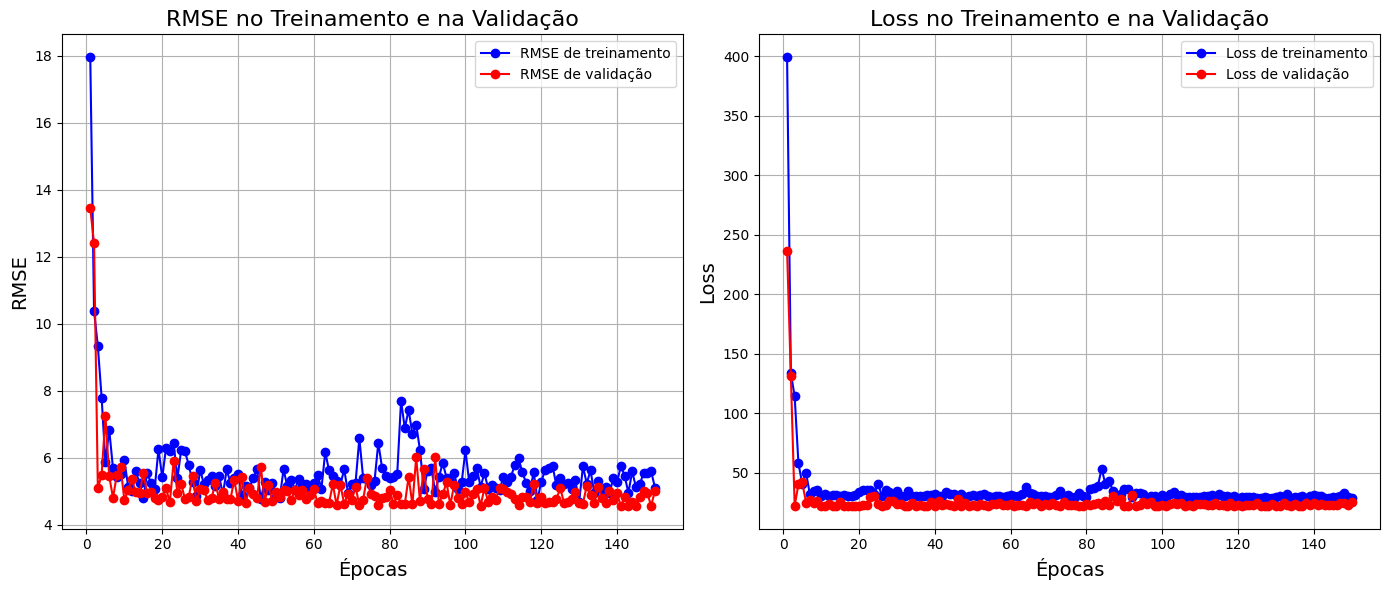

In [ ]:
import matplotlib.pyplot as plt

# Suponha que 'history' é o retorno da função fit() do seu modelo
loss = history.history['loss']
val_loss = history.history['val_loss']
rmse = history.history['rmse']
val_rmse = history.history['val_rmse']
epochs = range(1, len(loss) + 1)

# Plot da RMSE
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, rmse, 'o-', color='blue', label='RMSE de treinamento')
plt.plot(epochs, val_rmse, 'o-', color='red', label='RMSE de validação')
plt.title('RMSE no Treinamento e na Validação', fontsize=16)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.legend()
plt.grid(True)

# Plot da perda
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'o-', color='blue', label='Loss de treinamento')
plt.plot(epochs, val_loss, 'o-', color='red', label='Loss de validação')
plt.title('Loss no Treinamento e na Validação', fontsize=16)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Predição e visualização
predictions = model.predict(test_data)

# Colocar valores reais e preditos em um DataFrame
results_df = pd.DataFrame({'Valor Real': test_targets, 'Valor Predito': predictions.flatten()})

# Exibir o DataFrame
print(results_df.head(10))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
     Valor Real  Valor Predito
30           19      19.289413
171          16      15.491813
84           20      18.932611
198          10      14.404210
60           28      18.066393
155          24      15.257240
45           21      19.197863
181          18      15.025860
9            28      18.416838
195          15      14.404210
